In [1]:
import os
import numpy as np

import fitsio
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
import legacyhalos.io
from legacyhalos.misc import lambda2mhalo, statsinbins, legacyhalos_plot_style

In [3]:
sns = legacyhalos_plot_style()
%matplotlib inline

### Read the Legacy Surveys (LS)

In [24]:
lhphot = legacyhalos.io.read_results(extname='LHPHOT', verbose=True)

Read 1562 objects from extension LHPHOT of /Users/ioannis/research/projects/legacyhalos/legacyhalos-results.fits


In [25]:
lsphot = legacyhalos.io.read_parent(extname='LSPHOT', upenn=True, verbose=True)
rm = legacyhalos.io.read_parent(extname='REDMAPPER', upenn=True, verbose=True)
sdssphot = legacyhalos.io.read_parent(extname='SDSSPHOT', upenn=True, verbose=True)
upenn = legacyhalos.io.read_parent(extname='UPENN', verbose=True)

Read 1562 objects from /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-upenn.fits [LSPHOT]
Read 1562 objects from /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-upenn.fits [REDMAPPER]
Read 1562 objects from /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-upenn.fits [SDSSPHOT]
Read 1562 objects from /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-upenn.fits [UPENN]


In [35]:
lsphot['flux_w1'].data

array([  749.38153076,  1377.44458008,  1331.82263184, ...,  2260.62548828,
         329.05337524,   213.49668884], dtype=float32)

#### New legacyhalos (LH) photometry

In [ ]:
lhphot = legacyhalos.io.read_results(extname='LHPHOT', verbose=True)

In [18]:
def getmag(flux):
    mag = 22.5 - 2.5 * np.log10( flux )
    return mag

In [43]:
lsmag = getmag(parent['flux_r'])
lhmag = getmag(lhphot['flux_r'])
good = np.isfinite(lsmag) * np.isfinite(lhmag)
lsmag = lsmag[good]
lhmag = lhmag[good]
dmag = lsmag - lhmag
stats = statsinbins(lhmag, dmag, binsize=0.2, minpts=15)
print(stats['ymedian'])

[-0.05971861  0.01761913  0.01686668 -0.00383663 -0.00719643  0.03794527
  0.02533436  0.02001762  0.04922771  0.04404068  0.04369926  0.0627079
  0.06208229  0.06274223 -0.01136684]


/usr/local/anaconda3/envs/legacyhalos/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


## Need to plot this versus stellar mass!

Text(0,0.5,'$r_{LegacySurvey}\\ -\\ r_{Total}$')

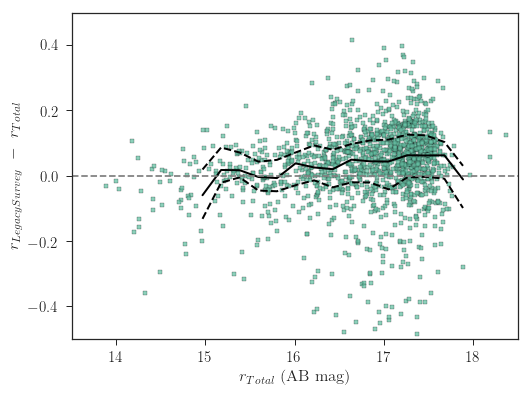

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
#ax.hexbin(lsmag, dmag, gridsize=100, mincnt=1, bins='log', 
#          cmap='viridis', extent=(15, 18.5, -0.5, 0.5))
ax.scatter(lhmag, dmag, marker='s', edgecolor='k', alpha=0.75, s=10)
ax.plot(stats['xbin'], stats['ymedian'], lw=2, ls='-', color='k')
ax.plot(stats['xbin'], stats['y75'], lw=2, ls='--', color='k')
ax.plot(stats['xbin'], stats['y25'], lw=2, ls='--', color='k')

ax.set_xlim(13.5, 18.5)
ax.set_ylim(-0.5, 0.5)
ax.axhline(y=0, ls='--', color='gray')
ax.set_xlabel(r'$r_{Total}$ (AB mag)')
ax.set_ylabel(r'$r_{LegacySurvey}\ -\ r_{Total}$')

In [ ]:
stop

In [48]:
fitsio.FITS('/Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-isedfit.fits')


  file: /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-isedfit.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      LSPHOT-ISEDFIT
  2      BINARY_TBL      SDSSPHOT-ISEDFIT
  3      BINARY_TBL      LSPHOT-KCORR
  4      BINARY_TBL      SDSSPHOT-KCORR

In [56]:
lsisedfit = legacyhalos.io.read_parent(extname='LSPHOT-ISEDFIT', upenn=True, isedfit=True, verbose=True)
sdssisedfit = legacyhalos.io.read_parent(extname='SDSSPHOT-ISEDFIT', upenn=True, isedfit=True, verbose=True)

Read 53441 objects from /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-isedfit.fits [LSPHOT-ISEDFIT]
Read 53441 objects from /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-isedfit.fits [SDSSPHOT-ISEDFIT]


[-0.00293636  0.03001595  0.03294659  0.02128315  0.02827024  0.02752638
  0.03201675  0.03526258  0.03540134  0.03738117  0.03940773  0.0414381
  0.0420084   0.04121017  0.04284096  0.04199123  0.04175663  0.04659843
  0.0523324   0.06306362  0.0910244   0.14008665]


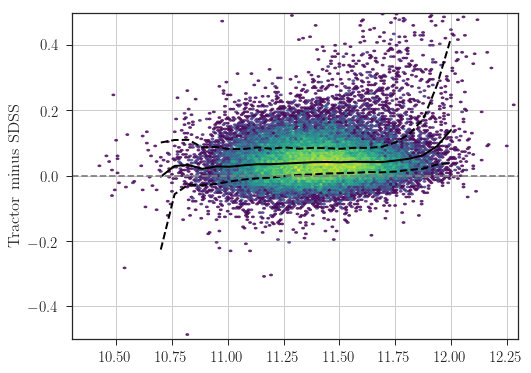

In [83]:
lsmass = lsisedfit['mstar_avg'].data
sdssmass = sdssisedfit['mstar_avg'].data
deltamass = lsmass - sdssmass
stats = statsinbins(lsmass, deltamass, binsize=0.2, minpts=20, xmax=12, xmin=10.7)
print(stats['ymedian'])

fig, ax = plt.subplots(figsize=(8, 6))
ax.hexbin(lsmass, deltamass, gridsize=200, mincnt=2, bins='log', 
          cmap='viridis', extent=(10, 12.5, -0.5, 0.5), alpha=0.75)
#ax.scatter(lsmass, deltamass, marker='s', edgecolor='k', alpha=0.75, s=10)
ax.plot(stats['xbin'], stats['ymedian'], lw=2, ls='-', color='k')
ax.plot(stats['xbin'], stats['y75'], lw=2, ls='--', color='k')
ax.plot(stats['xbin'], stats['y25'], lw=2, ls='--', color='k')

ax.set_xlim(10.3, 12.3)
ax.set_ylim(-0.5, 0.5)
ax.axhline(y=0, ls='--', color='gray')
#ax.set_xlabel(r'$r_{Total}$ (AB mag)')
ax.set_ylabel('Tractor minus SDSS')
ax.grid()

In [ ]:
mhalo = np.log10(lambda2mhalo(cat.lambda_chisq, redshift=cat.z))
mhalo

In [ ]:
mstar_med, bin_edges, _ = binned_statistic(mhalo, cat.mstar_avg, statistic='median', bins=bins)
bin_width = (bin_edges[1] - bin_edges[0])
mhalo_med = bin_edges[1:] - bin_width/2
print(bin_width)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = iter(sns.color_palette())

rich = cat.lambda_chisq > 100
ax.plot(mhalo_med, mstar_med, color='k', ls='-', lw=3, alpha=0.5)
ax.plot(mhalo_med, mstar_p75, color='k', ls='--', lw=3, alpha=0.5)
ax.plot(mhalo_med, mstar_p25, color='k', ls='--', lw=3, alpha=0.5)

g = ax.errorbar(gonz['m500'], gonz['mbcg'], yerr=gonz['mbcg_err'], color=next(colors),
                fmt='o', label='Gonzalez+13', markersize=10)
k = ax.errorbar(krav['m500'], krav['mbcg'], yerr=krav['mbcg_err'], color=next(colors),
                fmt='s', label='Kravtsov+14', markersize=10)
r = ax.scatter(mhalo[rich], cat.mstar_avg[rich], alpha=0.9, color=next(colors),
               edgecolor='k', marker='D', s=50, label=r'redMaPPer ($\lambda>100$)')

ax.text(0.12, 0.16, 'redMaPPer\n$0.1<z<0.3$', multialignment='center',
        transform=ax.transAxes, fontsize=14)
m500 = np.linspace(13.55, 15.25, 50)
ff = ax.plot(m500, np.polyval([0.33, 12.24], m500-14.5), ls='-', 
            color='k', label=r'$M_{*}\propto M_{500}^{0.33}$')
ax.text(0.12, 0.9, r'$M_{*}\propto M_{500}^{0.33}$', multialignment='center',
        transform=ax.transAxes, fontsize=16)
ax.plot([13.55, 13.68], [12.8, 12.8], ls='-', color='k') # hack!!!

#ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

hh = [g, k, r]
ax.legend(hh, [H.get_label() for H in hh], loc='lower right',
          frameon=True, fontsize=16)
#ax.legend(ff, ff.get_label(), loc='upper left',
#          frameon=True, fontsize=16)
#ax.legend(loc='upper left', frameon=True, fontsize=16)

ax.set_ylim(10.5, 13)
ax.set_xlim(13.5, 15.3)
ax.set_xlabel(r'$\log_{10}\, (M_{500}\ /\ M_{\odot})$')
ax.set_ylabel(r'$\log_{10}\, (M_{*}\ /\ M_{\odot})$')

In [ ]:
sns.jointplot(ls['MSTAR_AVG'], sdss['MSTAR_AVG'] - ls['MSTAR_AVG'], 
              kind="kde", color="#4CB391", xlim=(10, 13), ylim=(-0.5, 0.5))
sns.kdeplot(ls['MSTAR_AVG'], sdss['MSTAR_AVG'] - ls['MSTAR_AVG'], 
            cmap="Blues", shade=True, shade_lowest=True, cbar=True,
            cut=0,
           )